In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os

In [2]:
BASE = '/Users/mchrusci/uj/shaper_data/adversarial'

In [3]:
def load(path):
    adv_samples_path = os.path.join(BASE, path)
    with np.load(adv_samples_path) as adv_samples:
        X = adv_samples['X']
        Y = adv_samples['Y']
        pred = adv_samples['pred']
        prob = adv_samples['prob']
    return X, Y, pred, prob

def load_drawings(path):
    with np.load(path) as data:
        X = data['X']
        Y = data['Y']
    return X, Y

def plot_idxs(X, Y, pred, prob, targeted, idxs, name):
    title = 'target = %d' if targeted else 'true = %d'
    fig = plt.figure(figsize=(10,3))
    fig.suptitle('%s adversarial samples' % name, fontsize=12)
    
    def plot_one_sample(i):
        plt.subplot(1, 5, i + 1)
        plt.title(title % Y[idxs[i]] + '\npred = %d (%.2f)' % (pred[idxs[i]], prob[idxs[i]]))
        plt.axis('off')
        plt.imshow(X[idxs[i]].reshape(28, 28), cmap='gray')
    
    for i in range(len(idxs)):
        plot_one_sample(i)
    
    plt.show()

def plot_random(X, Y, pred, prob, targeted):
    idxs = np.random.randint(0, X.shape[0], 5)
    plot_idxs(X, Y, pred, prob, targeted, idxs, 'Random')
    
def plot_random_drawings(X, n=None, accs=None):
    idxs = np.random.randint(0, X.shape[0], 5)
    fig = plt.figure(figsize=(10,3))
    if n is None and accs is None:
        pass
    else:
        fig.suptitle('Drawned mnist, n = %d, accurracy = %f' % (n, accs[n-1]), fontsize=12)
    
    def plot_one_sample(i):
        plt.subplot(1, 5, i + 1)
        plt.axis('off')
        plt.imshow(X[idxs[i]].reshape(28, 28), cmap='gray')
    
    for i in range(len(idxs)):
        plot_one_sample(i)
    
    plt.show()
    
def plot_best(X, Y, pred, prob, targeted):
    success_samples_idx = np.where(pred == Y) if targeted else np.where(pred != Y)
    probs_sorted = prob.argsort()[::-1]
    idxs = []
    for i in probs_sorted:
        if i in success_samples_idx[0]:
            idxs.append(i)
        if len(idxs) == 5:
            break
    
    plot_idxs(X, Y, pred, prob, targeted, idxs, 'Best')
    
def plot_drawing_defense(path):
    seed = np.random.randint(0, 1000)
    X, _ = load_drawings(os.path.join(BASE, path.split('.npz')[0] + '-redrawned.npz'))
    np.random.seed(seed)
    plot_random_drawings(X)
    X, _, _, _ = load(path)
    np.random.seed(seed)
    plot_random_drawings(X)

# Testowany model
accuracy = 0.9914  
Model A (3,382,346 parameters): Conv(64, 5, 5) + Relu, Conv(64, 5, 5) + Relu,
Dropout(0.25), FC(128) + Relu, Dropout(0.5), FC + Softmax

### Accuracy na rysunkach

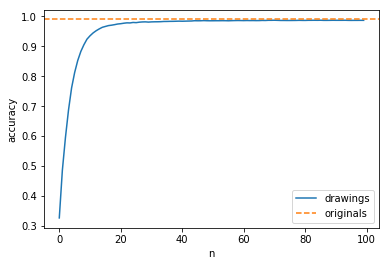

In [4]:
accs = [0.3267, 0.4862, 0.5953, 0.6875, 0.7613, 0.8129, 0.8528, 0.8829, 0.9054, 0.9241, 0.9355, 0.945, 0.9524, 0.9585, 0.9638, 0.9667, 0.9695, 0.9709, 0.9727, 0.9748, 0.9759, 0.9775, 0.9787, 0.9784, 0.98, 0.9794, 0.9809, 0.9817, 0.982, 0.9812, 0.9819, 0.9822, 0.9823, 0.9826, 0.9833, 0.9834, 0.9837, 0.9838, 0.9841, 0.9844, 0.9841, 0.9844, 0.9847, 0.9849, 0.9858, 0.9856, 0.9857, 0.9862, 0.9858, 0.9856, 0.9857, 0.9858, 0.9858, 0.986, 0.9859, 0.9856, 0.986, 0.9863, 0.9865, 0.9864, 0.9862, 0.9865, 0.9863, 0.9864, 0.9862, 0.9863, 0.9868, 0.9866, 0.9872, 0.9872, 0.9874, 0.9871, 0.9867, 0.9867, 0.9866, 0.9866, 0.9867, 0.9868, 0.9871, 0.9869, 0.9868, 0.9872, 0.9872, 0.9873, 0.9872, 0.9874, 0.987, 0.987, 0.9871, 0.9873, 0.9872, 0.9872, 0.9872, 0.9873, 0.987, 0.9869, 0.987, 0.987, 0.9871, 0.9871]
plt.plot(accs)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.axhline(y=0.9914, linestyle='--', c='C1')
plt.legend(['drawings', 'originals'])
plt.show()

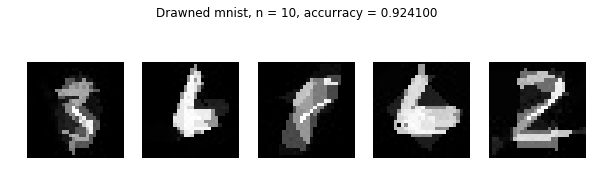

In [5]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-10.npz')
plot_random_drawings(X, 10, accs)

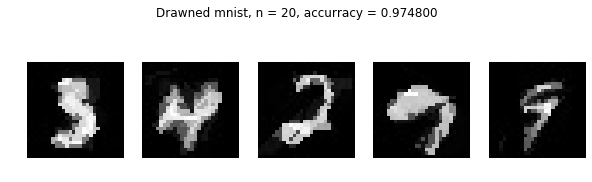

In [6]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-20.npz')
plot_random_drawings(X, 20, accs)

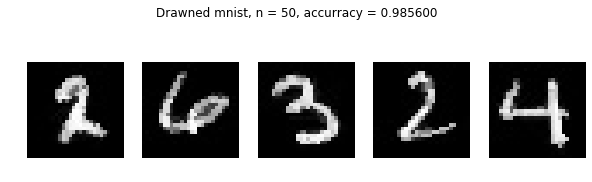

In [7]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-50.npz')
plot_random_drawings(X, 50, accs)

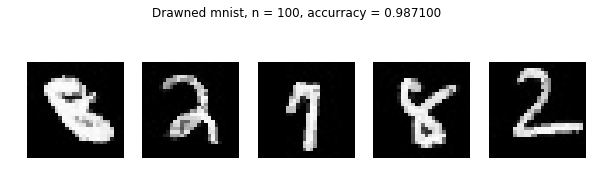

In [8]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-100.npz')
plot_random_drawings(X, 100, accs)

# Testowane ataki
norm = linf, eps = 0.3
* baseline
    * **--alpha 0.0 --targeted_flag 0**
    * **--alpha 0.0 --targeted_flag 1**
    * **--alpha 0.6 --targeted_flag 0**
* query-based
    * --method query_based --loss_type cw --group_size 10
    * --method query_based --loss_type cw --num_groups 10
    * --method query_based --loss_type xent --group_size 10
    * --method query_based --loss_type xent --num_groups 10
    * --method query_based_un --loss_type cw --group_size 10
    * --method query_based_un --loss_type cw --num_groups 10
    * --method query_based_un --loss_type xent --group_size 10
    * --method query_based_un --loss_type xent --num_groups 10
    * --method query_based_un_iter --loss_type cw --group_size 10
    * --method query_based_un_iter --loss_type cw --num_groups 10
    * --method query_based_un_iter --loss_type xent --group_size 10
    * --method query_based_un_iter --loss_type xent --num_groups 10
    * --method query_based_iter --loss_type cw --group_size 10
    * --method query_based_iter --loss_type cw --num_groups 10
    * --method query_based_iter --loss_type xent --group_size 10
    * --method query_based_iter --loss_type xent --num_groups 10

### Difference of means untargeted
adversarial success = 39.33  
average l2 perturbation = 5.63

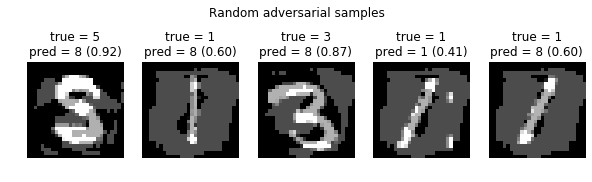

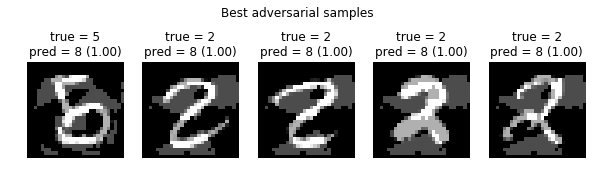

In [92]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.0-targeted-0-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

### Difference of means targeted
adversarial success = 13.59  
average l2 perturbation = 5.56

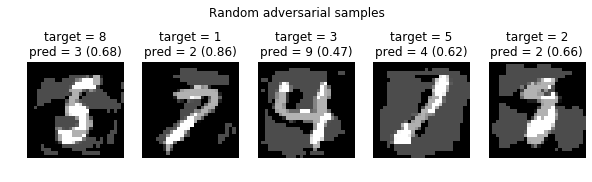

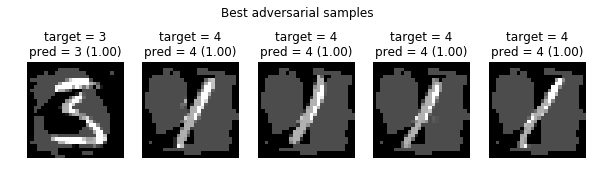

In [93]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.0-targeted-1-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=True)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=True)

### Random
adversarial success = 7.59   
average l2 perturbation = 6.12

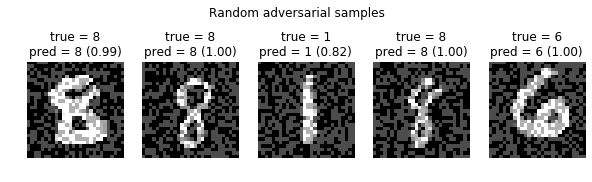

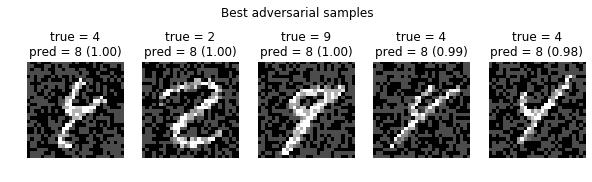

In [95]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.6-targeted-0-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

### FD-xent targeted
adversarial success = 31.5      
average l2 perturbation = 1.56

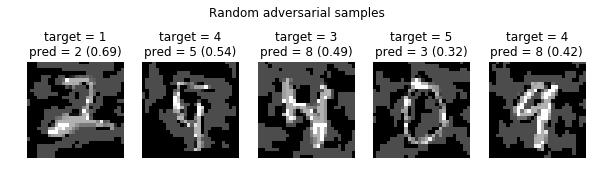

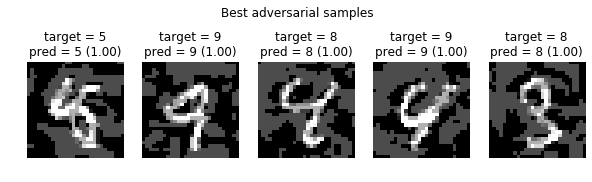

In [109]:
X, Y, pred, prob = load('query_based-norm-linf-eps-0.3-loss-xent-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=True)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=True)

### FD-xent untargeted
adversarial success = 30.70      
average l2 perturbation = 1.56

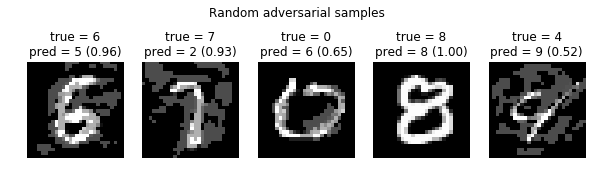

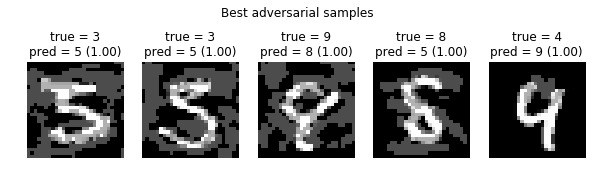

In [125]:
X, Y, pred, prob = load('query_based_un-norm-linf-eps-0.3-loss-xent-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

### FD-logit targeted
adversarial success = 31.2   
average l2 perturbation = 5.98

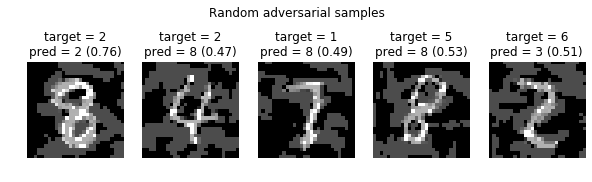

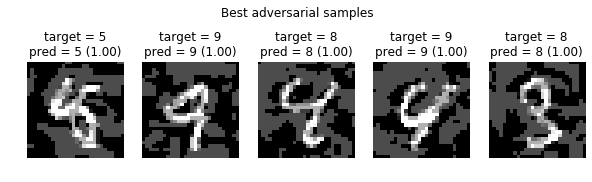

In [116]:
X, Y, pred, prob = load('query_based-norm-linf-eps-0.3-loss-cw-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=True)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=True)

### FD-logit untargeted
adversarial success = 95.7      
average l2 perturbation = 5.92

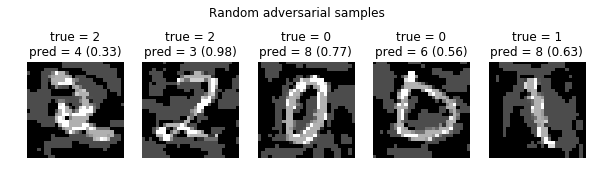

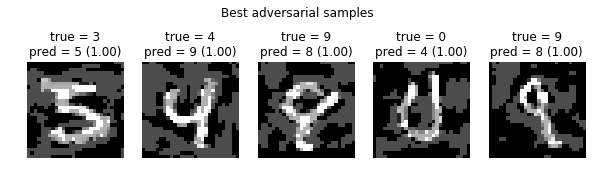

In [115]:
X, Y, pred, prob = load('query_based_un-norm-linf-eps-0.3-loss-cw-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

### IFD-xent targeted
adversarial success = 100  
average l2 perturbation = 4.17

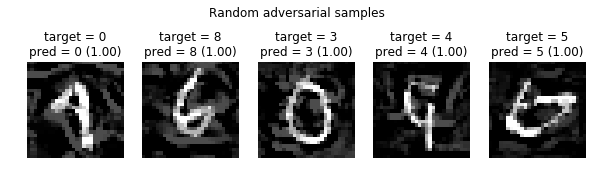

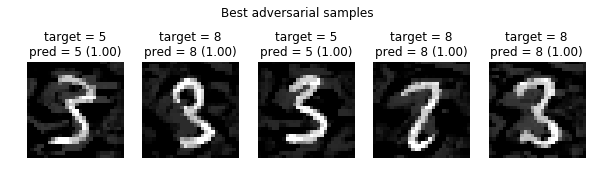

In [63]:
X, Y, pred, prob = load('query_based_iter-norm-linf-eps-0.3-loss-xent-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=True)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=True)

### IFD-xent untargeted
adversarial success = 38.6  
average l2 perturbation = 1.78

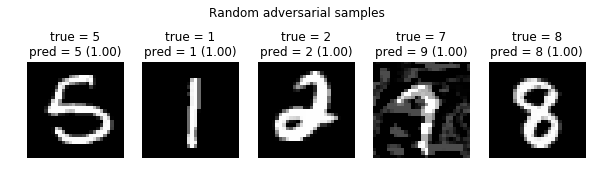

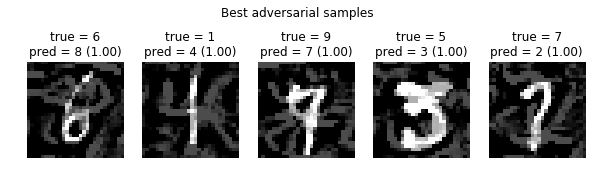

In [11]:
X, Y, pred, prob = load('query_based_un_iter-norm-linf-eps-0.3-loss-xent-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

### IFD-logit targeted
adversarial success = 99.5  
average l2 perturbation = 2.66

In [ ]:
X, Y, pred, prob = load('query_based_iter-norm-linf-eps-0.3-loss-cw-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

### IFD-logit untargeted
adversarial success = 100  
average l2 perturbation = 1.96

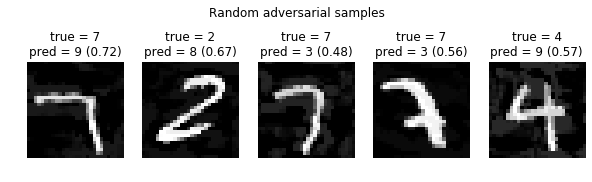

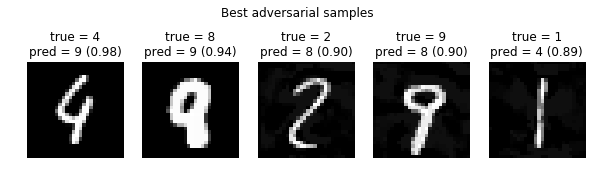

In [12]:
X, Y, pred, prob = load('query_based_un_iter-norm-linf-eps-0.3-loss-cw-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

# Obrona rysunkowa

In [1]:
from es.draw_multiple import draw

### Difference of means untargeted
adversarial success  
before: 39.33%   
after: 80.92% $\uparrow$

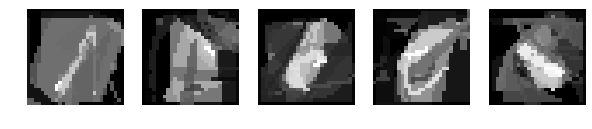

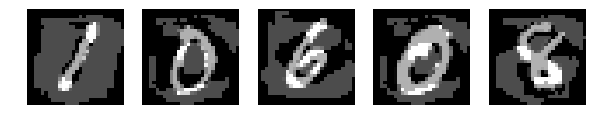

In [24]:
plot_drawing_defense('baseline-norm-linf-alpha-0.0-targeted-0-adv-samples.npz')

### Difference of means targeted
adversarial success  
before: 13.59%   
after: 27.54% $\uparrow$

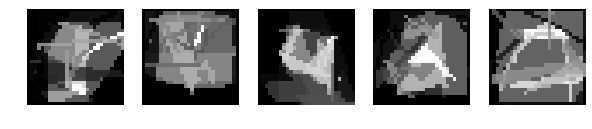

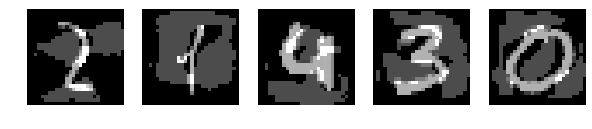

In [25]:
plot_drawing_defense('baseline-norm-linf-alpha-0.0-targeted-1-adv-samples.npz')

### Random
adversarial success  
before: 7.59 %   
after: 32.69% $\uparrow$

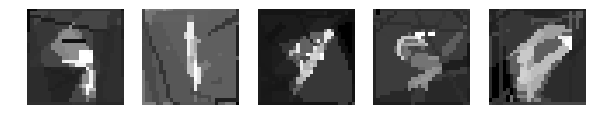

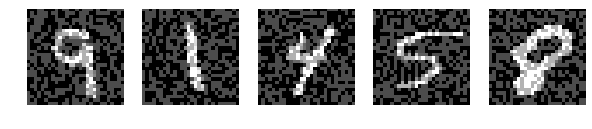

In [26]:
plot_drawing_defense('baseline-norm-linf-alpha-0.6-targeted-0-adv-samples.npz')

### FD-xent targeted
adversarial success  
before: 31.5 %   
after: 11.1% $\downarrow$

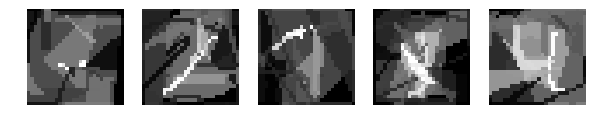

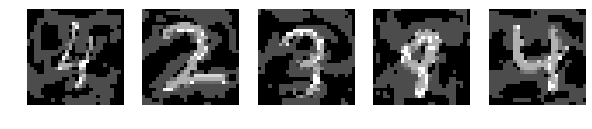

In [29]:
plot_drawing_defense('query_based-norm-linf-eps-0.3-loss-xent-adv-samples.npz')

### FD-xent untargeted
adversarial success  
before: 30.70%   
after: 28.5% $\downarrow$

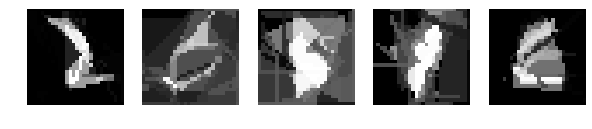

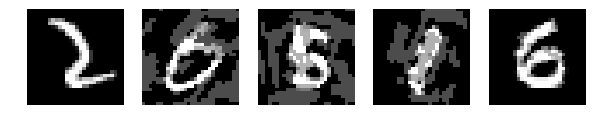

In [39]:
plot_drawing_defense('query_based_un-norm-linf-eps-0.3-loss-xent-adv-samples.npz')

### FD-logit targeted
before: 31.2%   
after: 10.2% $\downarrow$

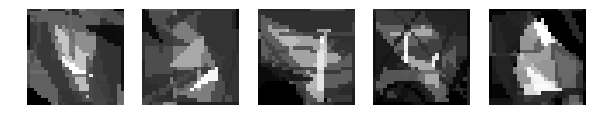

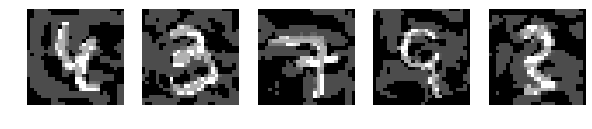

In [40]:
plot_drawing_defense('query_based-norm-linf-eps-0.3-loss-cw-adv-samples.npz')

### FD-logit untargeted    
before: 95.7%   
after: 65.8% $\downarrow$

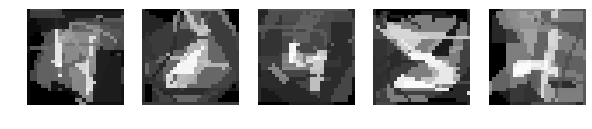

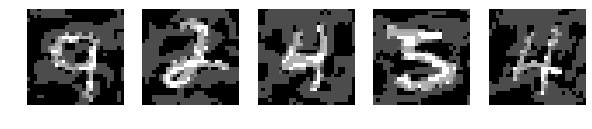

In [41]:
plot_drawing_defense('query_based_un-norm-linf-eps-0.3-loss-cw-adv-samples.npz')

### IFD-xent untargeted
before: 38.6%   
after: 32.8% $\downarrow$

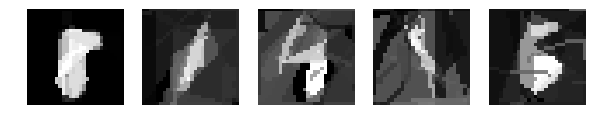

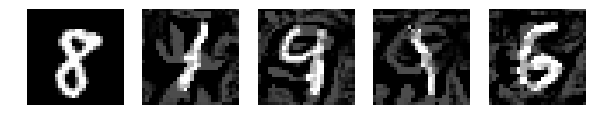

In [56]:
plot_drawing_defense('query_based_un_iter-norm-linf-eps-0.3-loss-xent-adv-samples.npz')

### IFD-logit untargeted
before: 100%   
after: 26.6% $\downarrow$

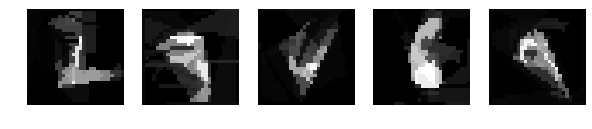

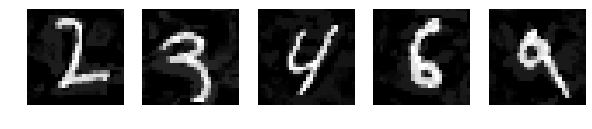

In [58]:
plot_drawing_defense('query_based_un_iter-norm-linf-eps-0.3-loss-cw-adv-samples.npz')

### IFD-logit targeted
before: 99.5%   
after: 4% $\downarrow$

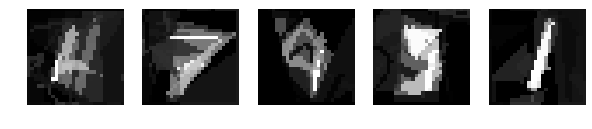

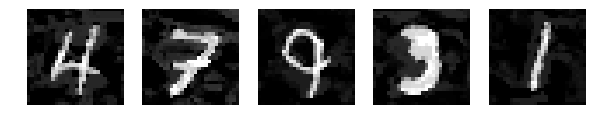

In [62]:
plot_drawing_defense('query_based_iter-norm-linf-eps-0.3-loss-cw-adv-samples.npz')

### IFD-xent targeted
before: 100%   
after: 16.2% $\downarrow$

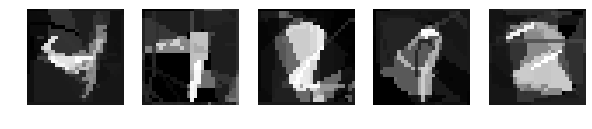

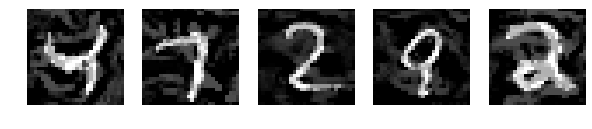

In [72]:
plot_drawing_defense('query_based_iter-norm-linf-eps-0.3-loss-xent-adv-samples.npz')

## Podsumowanie wyników

### untargeted
|method  |adversarial success (paper) |adversarial success with drawings|
|--|--|--|
|D. of M.  | 39.33% (44.8) |80.92% |
|Random  | 7.59% (8.5)| 32.69%|
|FD-xent  | 30.70% (51.6)|28.5% |
|FD-logit  | 95.7% (92.9)| 65.8%|
|IFD-xent  | 38.6% (75)|32.8% |
|IFD-logit | 100% (100)| **26.6%**|

### targeted
|method  |adversarial success (paper) |adversarial success with drawings|
|--|--|--|
|D. of M.  | 13.59% (15)|27.54% |
|FD-xent  | 31.5% (30)|11.1% |
|FD-logit  | 31.2% (29.9)| 10.2%|
|IFD-xent  | 100% (100)|16.2% |
|IFD-logit | 99.5% (99.7)| **4%**|